In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install tpot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from tpot import TPOTClassifier

In [4]:
df = pd.read_csv('IRIS.csv')
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
115,6.4,3.2,5.3,2.3,Iris-virginica
16,5.4,3.9,1.3,0.4,Iris-setosa
143,6.8,3.2,5.9,2.3,Iris-virginica
32,5.2,4.1,1.5,0.1,Iris-setosa
56,6.3,3.3,4.7,1.6,Iris-versicolor


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isnull().any().any()

False

In [7]:
df['species']=df['species'].str.replace('Iris-','')

In [8]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Text(0, 0.5, 'Length/Width')

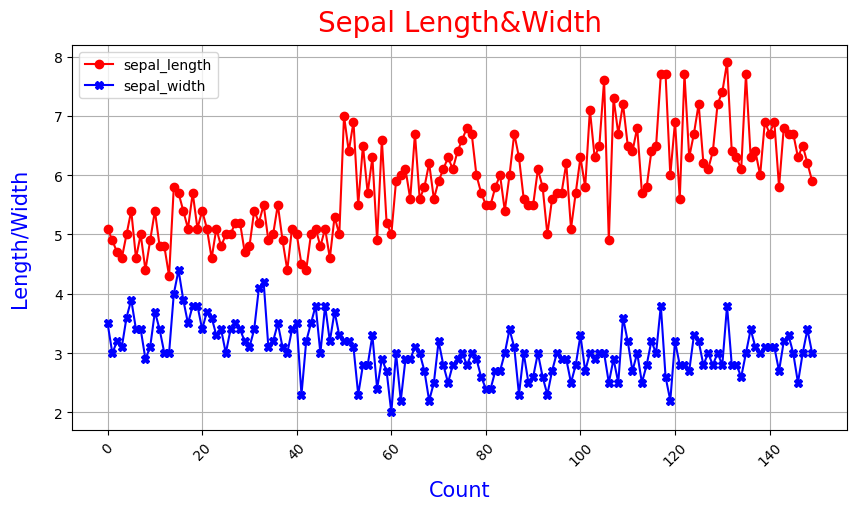

In [9]:
df['sepal_length'].plot(kind='line',legend=True,marker='o',color='r',figsize=(10,5),grid=True,rot=45)

df['sepal_width'].plot(kind='line',legend=True,marker="X",color='b',figsize=(10,5),grid=True,rot=45)

plt.title('Sepal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Text(0, 0.5, 'Length/Width')

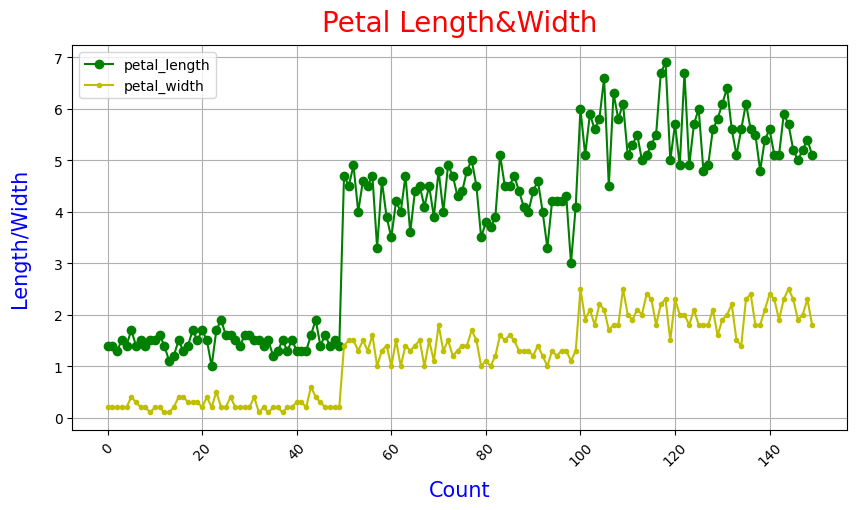

In [10]:
df['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)

df['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)

plt.title('Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

Text(0, 0.5, 'Length/Width')

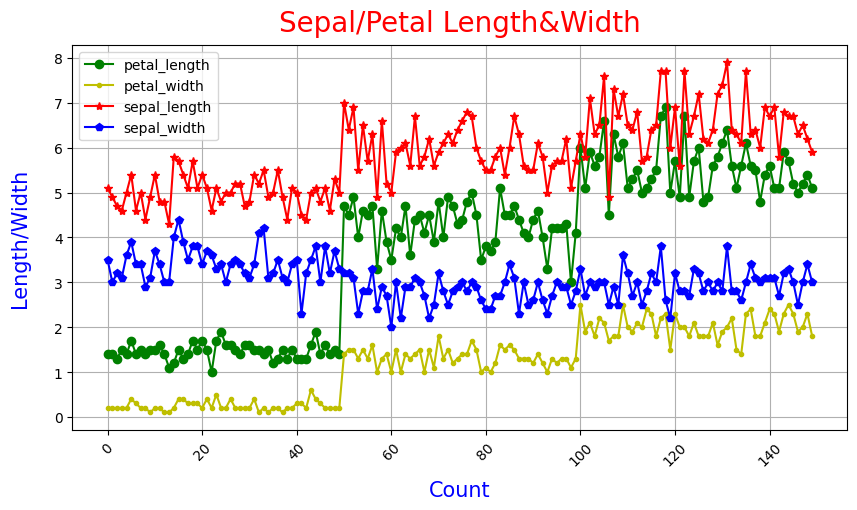

In [11]:
df['petal_length'].plot(kind='line',legend=True,marker='o',color='g',figsize=(10,5),grid=True,rot=45)

df['petal_width'].plot(kind='line',legend=True,marker=".",color='y',figsize=(10,5),grid=True,rot=45)

df['sepal_length'].plot(kind='line',legend=True,marker="*",color='r',figsize=(10,5),grid=True,rot=45)

df['sepal_width'].plot(kind='line',legend=True,marker="p",color='b',figsize=(10,5),grid=True,rot=45)

plt.title('Sepal/Petal Length&Width',pad=10,loc='center',fontdict={'fontsize': 20, 'color': 'r','verticalalignment': 'baseline',})
plt.xlabel('Count',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})
plt.ylabel('Length/Width',labelpad=20,loc='center',fontdict={'fontsize': 15, 'color': 'b','verticalalignment': 'baseline',})

C:\Users\Public.DESKTOP-074PO7P\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1700x600 with 0 Axes>

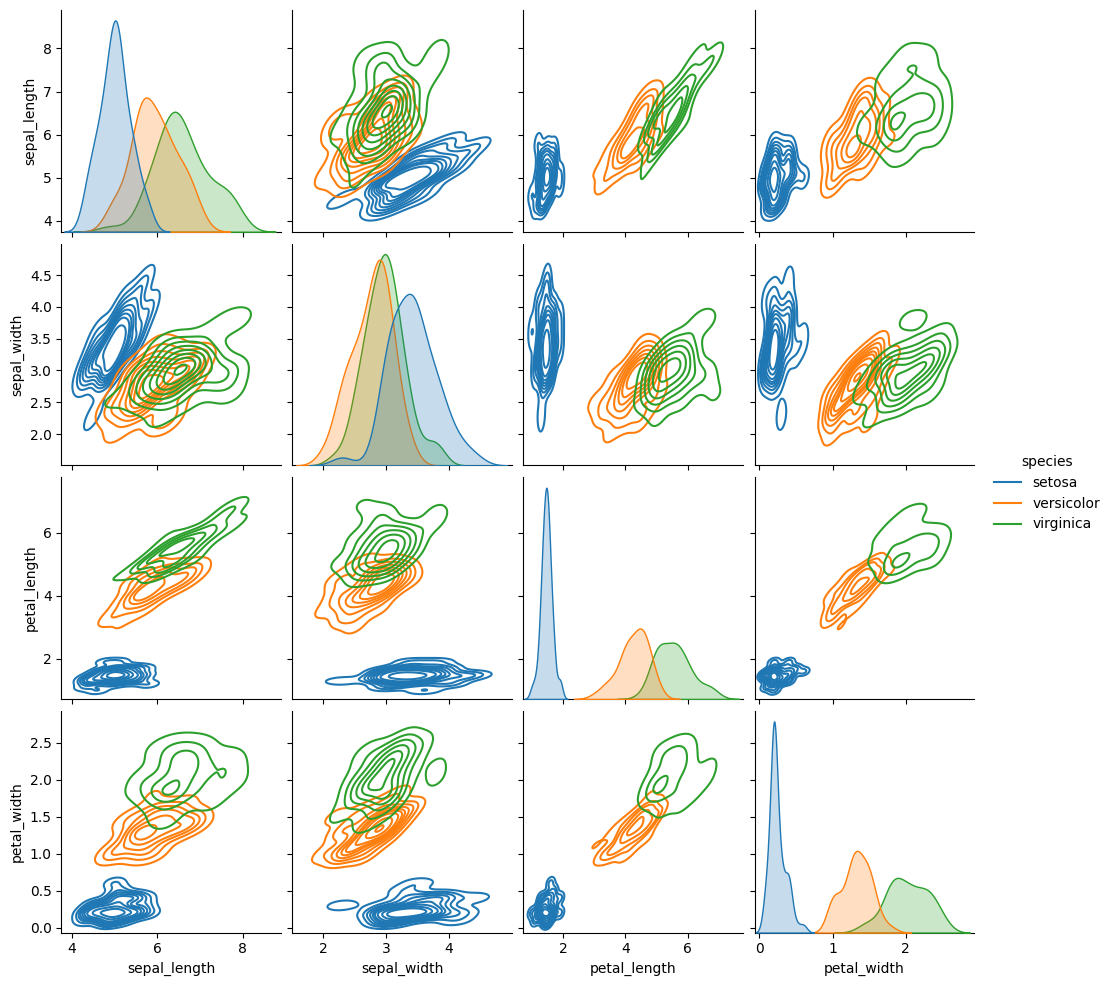

In [12]:
plt.figure(figsize=(17,6))
sns.pairplot(df,hue='species',kind='kde')

<Axes: title={'center': 'Species'}>

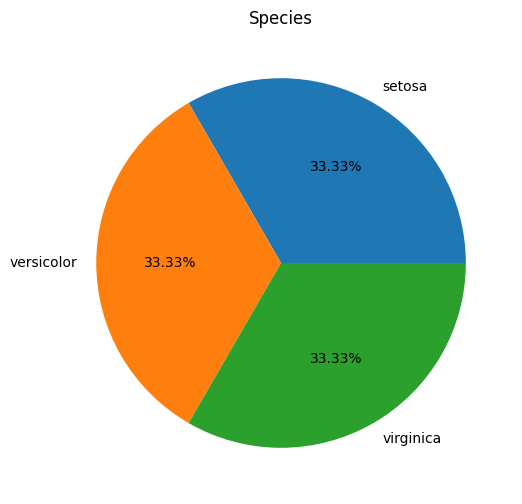

In [13]:
plt.figure(figsize=(17,6))
df['species'].value_counts().plot(kind='pie',autopct='%0.2f%%',ylabel='',title='Species')

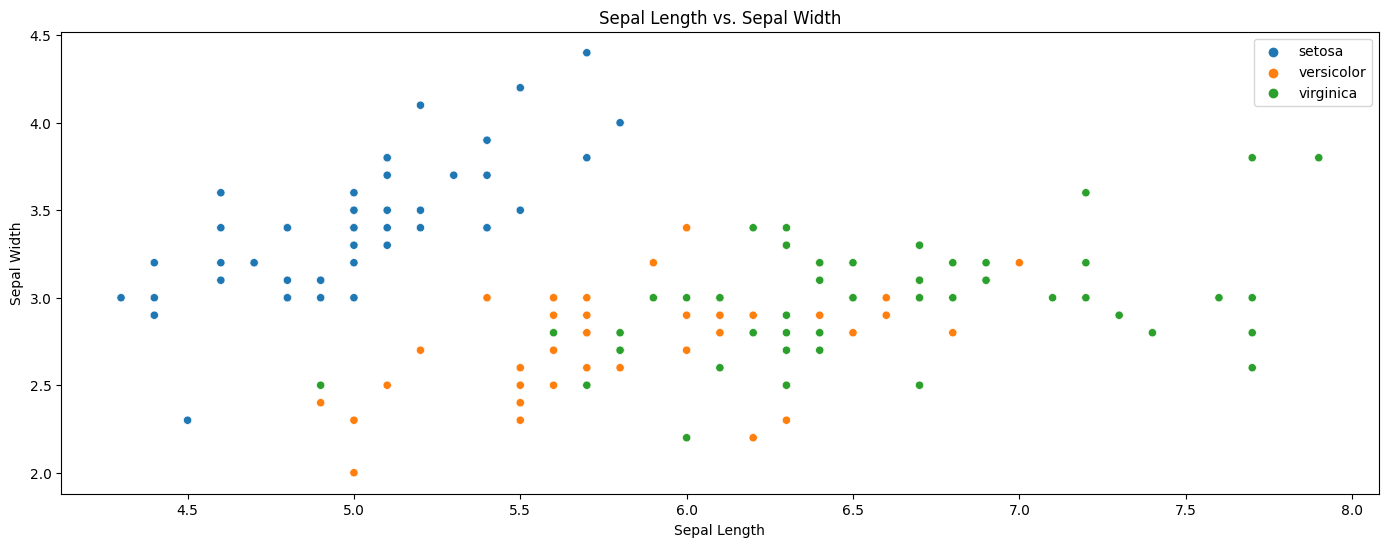

In [14]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue='species')
plt.legend(loc='upper right')
plt.title('Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

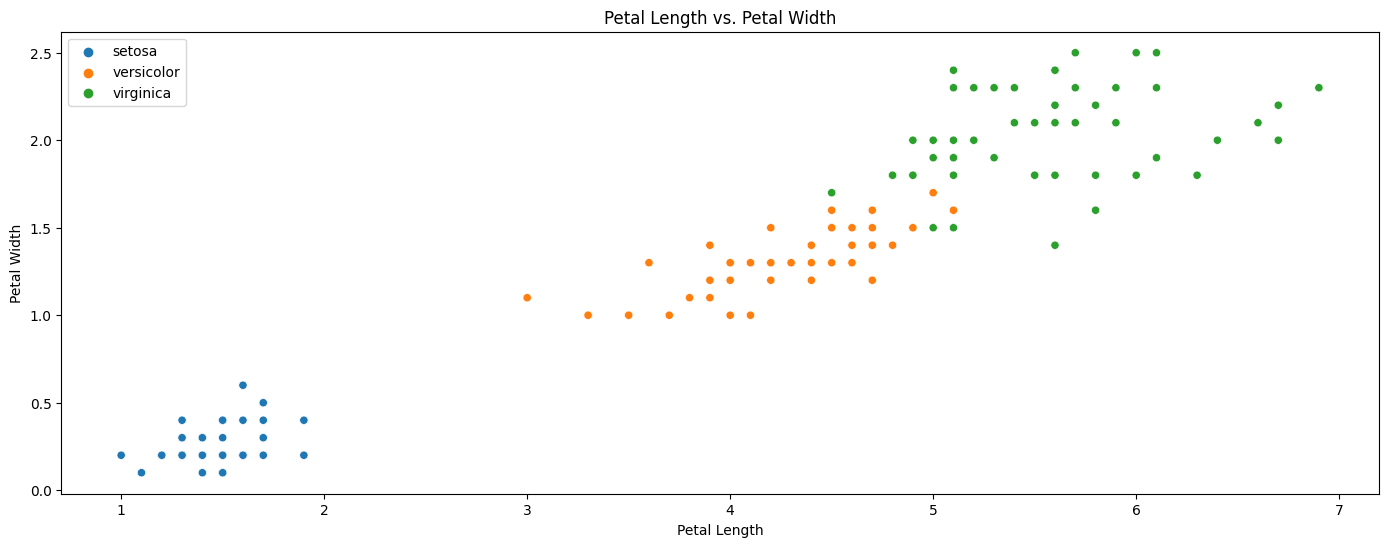

In [15]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.legend(loc='upper left')
plt.title('Petal Length vs. Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()

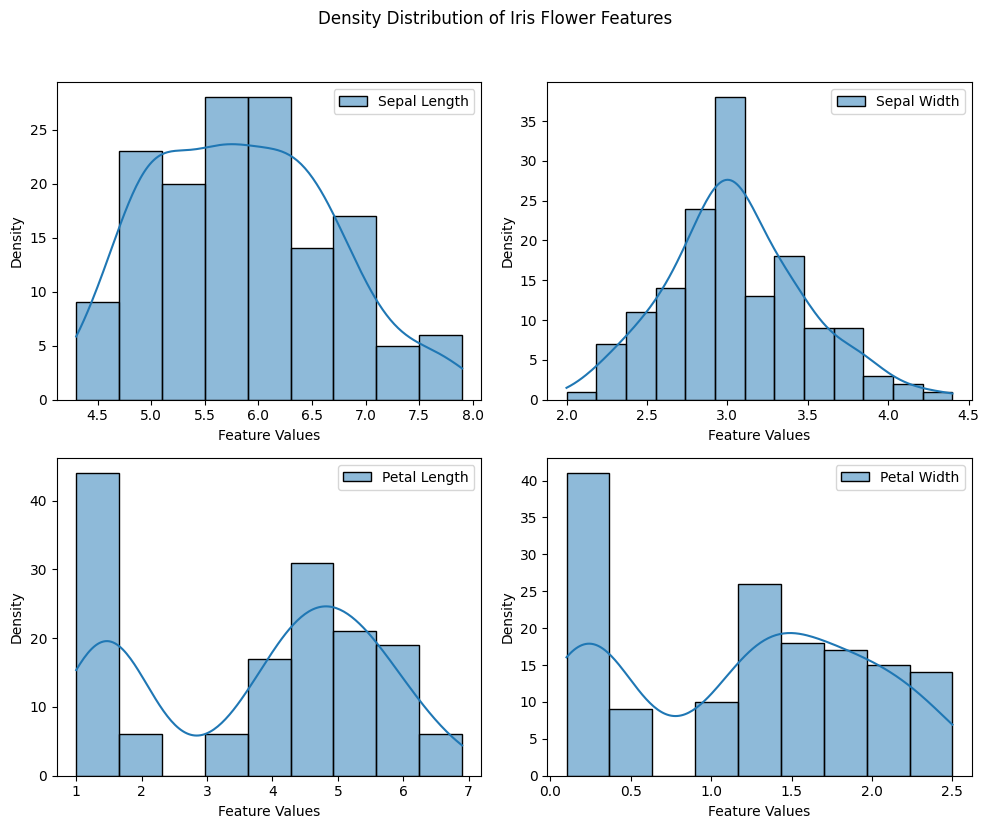

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Density Distribution of Iris Flower Features', y=1.03)

sns.histplot(data=df, x='sepal_length', label='Sepal Length', kde=True, ax=axes[0, 0])
sns.histplot(data=df, x='sepal_width', label='Sepal Width', kde=True, ax=axes[0, 1])
sns.histplot(data=df, x='petal_length', label='Petal Length', kde=True, ax=axes[1, 0])
sns.histplot(data=df, x='petal_width', label='Petal Width', kde=True, ax=axes[1, 1])

for ax in axes.flat:
    ax.legend()

for ax in axes.flat:
    ax.set(xlabel='Feature Values', ylabel='Density')

plt.tight_layout()
plt.show()


In [17]:
encode = LabelEncoder()

df['species']=encode.fit_transform(df['species'])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [18]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:4],df['species'],test_size=0.2,random_state=2)

In [19]:
tpot = TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2, scoring='accuracy')
tpot.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.975

Generation 2 - Current best internal CV score: 0.975

Generation 3 - Current best internal CV score: 0.9833333333333332

Generation 4 - Current best internal CV score: 0.9833333333333332

Generation 5 - Current best internal CV score: 0.9833333333333332

Best pipeline: LogisticRegression(MultinomialNB(input_matrix, alpha=10.0, fit_prior=True), C=25.0, dual=False, penalty=l2)


TPOTClassifier(generations=5, population_size=20, random_state=42,
               scoring='accuracy', verbosity=2)